In [1]:
import bs4 as bs
import pickle
import requests


import os
import pandas_datareader.data as web
import datetime as dt


import pandas as pd


import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np


In [2]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

#save_sp500_tickers()

In [9]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle","rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    
    for ticker in tickers:
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            #OR
            #df = web.DataReader(ticker, 'morningstar', start, end)
            #df.reset_index(inplace=True)           # if data taken from morningstar
            #df.set_index("Date", inplace=True)      # if data taken from morningstar
            #df = df.drop("Symbol", axis=1)          # if data taken from morningstar
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))
            
            
get_data_from_yahoo()
            
        
        

Already have MMM
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AET
Already have AMG
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have AGN
Already have ADS
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have APC
Already have ADI
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AIV
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ARNC
Already have ANET
Already have AJG
Already have A

In [16]:

def compile_data():
    with open("sp500tickers.pickle","rb") as f:
        tickers = pickle.load(f)
        
    main_df = pd.DataFrame()
    
    for count,ticker in enumerate(tickers):
        df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)
        
        #we *could* generate extra columns with interesting data, like:
        #df['{}_HL_pct_diff'.format(ticker)] = (df['High'] - df['Low']) / df['Low']
        #df['{}_daily_pct_chng'.format(ticker)] = (df['Close'] - df['Open']) / df['Open']
        
        df.rename(columns={'Adj Close':ticker}, inplace=True)
        df.drop(['Open','High','Low','Close','Volume'],1,inplace=True)
        
        
        if main_df.empty:
            main_df = df
            
        else:
            
            main_df = main_df.join(df, how='outer')
            
        if count % 50==0:
            print(count)
            
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')
    
compile_data()
            


        
                


        

0
50
100
150
200
250
300
350
400
450
500
                  MMM        ABT  ABBV  ABMD        ACN       ATVI       ADBE  \
Date                                                                            
2009-12-31  66.425102  18.449829   NaN  8.73  33.964603  10.102340  36.779999   
2010-01-04  66.706314  18.610439   NaN  8.74  34.431107  10.275106  37.090000   
2010-01-05  66.288513  18.460081   NaN  8.53  34.643883  10.293294  37.700001   
2010-01-06  67.228577  18.562599   NaN  8.40  35.012188  10.238736  37.619999   
2010-01-07  67.276794  18.716372   NaN  8.40  34.979450   9.993223  36.889999   

             AMD        AAP        AES ...        WLTW       WYNN        XEL  \
Date                                   ...                                     
2009-12-31  9.68  39.577698  10.916526 ...   62.729408  42.671738  15.112050   
2010-01-04  9.70  39.479923  11.211789 ...   63.656773  46.870762  15.012350   
2010-01-05  9.71  39.245274  11.096962 ...   63.514111  49.721409  14.8

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.930142  0.927578  0.806744  0.963370  0.935215  0.901204   
ABT   0.930142  1.000000  0.934955  0.868860  0.954083  0.898822  0.927778   
ABBV  0.927578  0.934955  1.000000  0.886898  0.935621  0.920849  0.932541   
ABMD  0.806744  0.868860  0.886898  1.000000  0.902689  0.928886  0.974461   
ACN   0.963370  0.954083  0.935621  0.902689  1.000000  0.963848  0.953941   

           AMD       AAP       AES    ...         WLTW      WYNN       XEL  \
MMM   0.487085  0.698482  0.456741    ...     0.957063  0.441131  0.969409   
ABT   0.487434  0.708144  0.583759    ...     0.924257  0.483774  0.915301   
ABBV  0.741166  0.169615  0.288114    ...     0.932741  0.240324  0.852057   
ABMD  0.743458  0.478960  0.501364    ...     0.830722  0.321919  0.826924   
ACN   0.560246  0.682671  0.473699    ...     0.952336  0.393122  0.970064   

           XRX      XLNX       XYL       YUM       ZBH      ZI

<IPython.core.display.Javascript object>


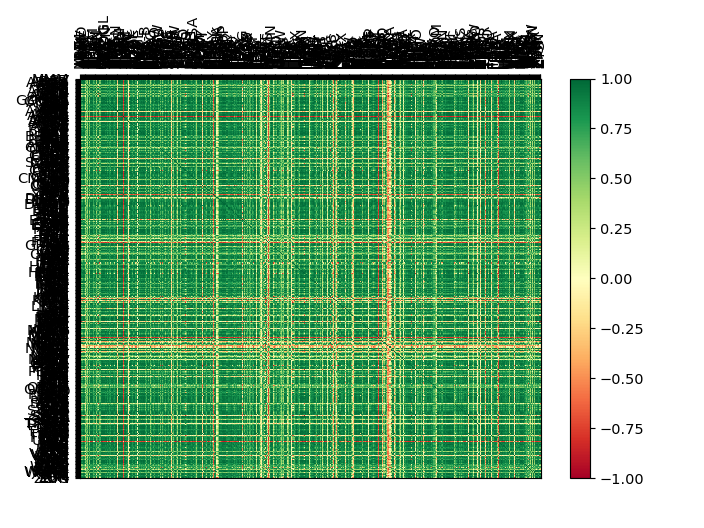

In [19]:
%matplotlib notebook
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    #df['AAPL'].plot()
    #plt.show()
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1,1,1) #or use (111)
    
    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)
    
    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1,1)
    plt.tight_layout()
    #plt.savefig("correlations.png", dpi = (300))
    plt.show()

visualize_data()
    
    